<a href="https://colab.research.google.com/github/fawazdhianabil/Basic-Python-Programming-for-Data-Science/blob/main/Outlier_1800015042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mengimport modul 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [ ]:
#Menentukan y dan x
%matplotlib inline
y = np.random.random(500)
x = np.arange(len(y))
print(len(x))

500


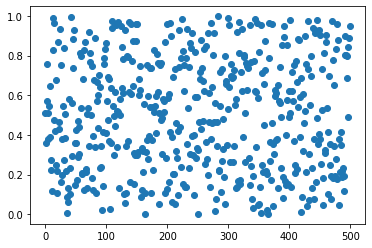

In [ ]:
#Membuat plot x dan y
plt.scatter(x,y)

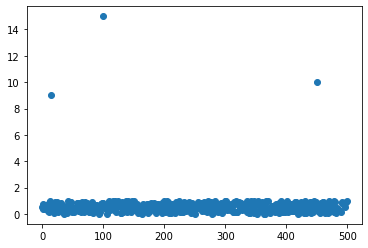

In [ ]:
y[15] = 9
y[450] = 10
y[100] = 15
plt.scatter(x,y)

In [ ]:
def G_Hitung(y):
    # Simpangan y
    std_dev = np.std(y)
    # Rata-rata y
    rata2_y = np.mean(y)
    # Nilai Mutlak selisih data dengan rata-rata
    selisih = abs(y-rata2_y)
    # Nilai Maksimal Selisih
    max_selisih=max(selisih)
    # Indeks Nilai Maksimal Selisih
    max_s_ind=np.argmax(selisih)
    # Menghitung GCAL
    Ghit=max_selisih/std_dev
    return Ghit, max_s_ind

In [ ]:
def G_Tabel(ukuran, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * ukuran), ukuran - 2)
    A = (ukuran - 1) * np.sqrt(np.square(t_dist))
    B = np.sqrt(ukuran) * np.sqrt(ukuran - 2 + np.square(t_dist))
    G_tabel = A / B
    return G_tabel

In [ ]:
#Membentuk fungsi ESD
def ESD(y, alpha, n):
    outlier=[]
    for i in range(n):
        G_tabel=G_Tabel(len(y), alpha)
        Ghit, max_s_ind = G_Hitung(y)
        if Ghit>G_tabel:
            outlier.append(y[max_s_ind])
            y = np.delete(y, max_s_ind)
    outlier=np.array(outlier)
    return outlier

In [ ]:
#Memasukkan input ke fungsi ESD
ESD(y, 0.01, 5)

array([15., 10.,  9.])